In [1]:
# # This file is part of Theano Geometry
#
# Copyright (C) 2017, Stefan Sommer (sommer@di.ku.dk)
# https://bitbucket.org/stefansommer/theanogemetry
#
# Theano Geometry is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# Theano Geometry is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with Theano Geometry. If not, see <http://www.gnu.org/licenses/>.
#

# Manifold Statistics - Examples on $\mathbb{S}^2$

In [2]:
from src.manifolds.S2 import *
M = S2(use_spherical_coords=True,chart_center='x')
print(M)

from src.plotting import *

2d sphere (ellipsoid parameters [1. 1. 1.], spherical_coords: True)


In [3]:
# Riemannian structure
from src.Riemannian import metric
metric.initialize(M)

# geodesics
from src.Riemannian import geodesic
geodesic.initialize(M)

# Logarithm map
from src.Riemannian import Log
Log.initialize(M)

INFO (theano.gof.compilelock): Waiting for existing lock by process '20933' (I am process '20914')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/stefan/.theano/compiledir_Linux-4.18--generic-x86_64-with-Ubuntu-18.10-cosmic-x86_64-3.6.6-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '20933' (I am process '20914')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/stefan/.theano/compiledir_Linux-4.18--generic-x86_64-with-Ubuntu-18.10-cosmic-x86_64-3.6.6-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '20933' (I am process '20914')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/stefan/.theano/compiledir_Linux-4.18--generic-x86_64-with-Ubuntu-18.10-cosmic-x86_64-3.6.6-64/lock_dir


using M.Exp for Logarithm


INFO (theano.gof.compilelock): Waiting for existing lock by process '20933' (I am process '20914')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/stefan/.theano/compiledir_Linux-4.18--generic-x86_64-with-Ubuntu-18.10-cosmic-x86_64-3.6.6-64/lock_dir


## Sample Data

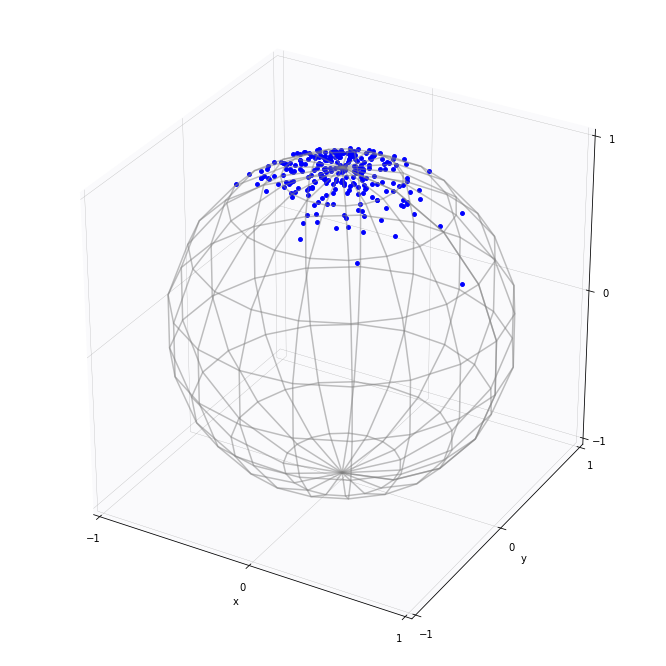

In [98]:
# coordinate form
from src.stochastics import Brownian_coords
Brownian_coords.initialize(M)

var = .2
n_steps.set_value(1000)

N_samples = 256
x = np.array([np.pi/2,np.pi/2])

samples = np.zeros((N_samples,M.dim.eval()))
for i in range(N_samples):
    (ts,xs) = M.Brownian_coordsf(x,var*dWsf(M.dim.eval()))
    samples[i] = xs[-1]

# plot
newfig()
M.plot()
for i in range(N_samples):
    M.plotx(samples[i])
plt.show()

In [99]:
samples

array([[1.82033807, 1.6211925 ],
       [1.45945072, 1.59154888],
       [1.37164258, 1.3537012 ],
       [1.87696895, 1.61586145],
       [1.62297253, 1.34825575],
       [1.50898873, 1.71485267],
       [1.66577752, 1.85375423],
       [1.60628305, 1.43181883],
       [1.45719578, 1.65198933],
       [1.68111148, 1.76346199],
       [1.38341142, 1.25375539],
       [1.21684175, 0.91840032],
       [1.70879148, 1.52790385],
       [1.61329439, 1.26186278],
       [1.1136858 , 1.98425719],
       [1.51139933, 1.49157612],
       [1.00656376, 1.3029901 ],
       [1.69204368, 1.81809774],
       [1.44573401, 1.46914464],
       [1.83786204, 1.64307654],
       [1.58154994, 1.83304399],
       [1.84511483, 1.51975981],
       [1.66176077, 1.88866903],
       [1.18973214, 1.36997845],
       [1.75608278, 1.64446425],
       [1.71095949, 1.48096974],
       [1.98838696, 1.30409442],
       [1.6666922 , 1.78587974],
       [1.27987584, 1.98363615],
       [1.66090014, 1.70223809],
       [1.

## Frechet mean

In [5]:
from src.statistics.Frechet_mean import *

res = Frechet_mean(M,lambda *args: M.Logf(*args), samples)
Fm = res[0]
print("loss = ", res[1])
print("mean = ", Fm)
iterations = res[2]

newfig()
M.plot(rotate = np.array([50,-45]))
M.plotx(Fm)
M.plotx(iterations)
plt.show()

KeyboardInterrupt: 

## Tangent PCA

In [ ]:
from src.statistics.tangent_PCA import *

from src.utils import *
from sklearn.decomposition import PCA

pca = tangent_PCA(M,lambda *args: M.Logf(*args),x,samples)
print(pca.get_covariance())

plt.scatter(pca.transformed_Logs[:, 0], pca.transformed_Logs[:, 1])
plt.axis('equal')
plt.show()

# ML mean estimation

In [63]:
options = {}
options['samples_per_obs'] = 1
options['epochs'] = 50
options['learning_rate'] = .5e0
options['varphi_update_rate'] = 1.
options['initial'] = [x+.0*np.random.randn(M.dim.eval())]
options['verbose'] = True

In [70]:
# Delyon/Hu guided process
from src.stochastics.guided_process import *

# guide function
Cholesky = T.slinalg.Cholesky()
# phi = lambda q,v: T.tensordot(T.nlinalg.MatrixInverse()(Cholesky(M.gsharp(q))),-(q-v).flatten(),(1,0))
phi = lambda q,v: T.tensordot(Cholesky(M.gsharp(q)).T,-(q-v).flatten(),(1,0))
x0 = M.element()
(Brownian_coords_guided,Brownian_coords_guidedf) = get_guided_likelihood(M,M.sde_Brownian_coords,phi,lambda x: Cholesky(M.gsharp(x)),x0)

In [71]:
# Transition density
# transition density etc.
q0 = M.element()
v = M.element()
thetas = (q0,)
log_p_Tf = theano.function([q0,v],log_p_T(q0,v,dWs(M.dim),Brownian_coords_guided,phi,options,sde=M.sde_Brownian_coords))
dlog_p_Tf = theano.function([q0,v],dlog_p_T(thetas,q0,v,dWs(M.dim),Brownian_coords_guided,phi,options,sde=M.sde_Brownian_coords))
p_Tf = theano.function([q0,v],T.exp(log_p_T(q0,v,dWs(M.dim),Brownian_coords_guided,phi,options,sde=M.sde_Brownian_coords)))

v = x
print(x)
print(v)
%time print(log_p_Tf(x,v))
%time print(p_Tf(x,v))
%time print(dlog_p_Tf(x,v))

transition density with v constant
transition density with v constant
transition density with v constant
[1.57079633 1.57079633]
[1.57079633 1.57079633]
-456.89025633932863
CPU times: user 109 ms, sys: 128 ms, total: 237 ms
Wall time: 60.2 ms
0.15954063761026502
CPU times: user 105 ms, sys: 72.2 ms, total: 178 ms
Wall time: 54.3 ms
[array(-1.83467915), array([-1.35336482e-19,  1.26694593e-04])]
CPU times: user 650 ms, sys: 331 ms, total: 980 ms
Wall time: 489 ms


In [103]:
from src.statistics.mle import *

def llog_p_T(thetas,pars):
    (v,seed) = pars
    if seed:
        srng.seed(seed)
    q = thetas[0]
    ie = 0
    while True:
        try:
            return dlog_p_Tf(q,v)
        except ValueError: 
            if i >= 5:
                print(ie,v)
            ie += 1
            pass    

def update_thetas(thetas, dthetas):
    q = thetas[0]
    
    q += options['learning_rate']*np.dot(M.gsharpf(q),dthetas[0]) # use Riemannian g-gradient
    
    return (q,)

In [ ]:
# run MLE
(thetas, log_likelihood, log_likelihoods, thetass) = iterative_mle(samples,llog_p_T,update_thetas,options)

# plot
plt.plot(range(options['epochs']),log_likelihoods)
# plt.savefig('ML_likelihoods.pdf')
plt.show()
plt.plot(range(options['epochs']),thetass[0].reshape((thetass[0].shape[0],-1)))
# plt.savefig('ML_thetas.pdf')
plt.show()

M.newfig()
M.plot()
M.plotx(thetas[0],s=150)
M.plotx(np.vstack((options['initial'][0],thetass[0])),color='blue',linewidth=2.5)
M.plotx(Fm,s=150,color='red')
M.plotx(np.vstack((np.zeros((1,2)),iterations)),color='red',linewidth=2.5)
plt.savefig('MLmean_iterations.pdf')
plt.show()

initial thetas: [[1.57079633 1.57079633]]
0 [1.66090014 1.70223809]
0 [1.6337426  1.65323112]
0 [1.74137839 1.5291286 ]
0 [1.27172027 1.53781482]
0 [1.89029803 1.06213369]
0 [1.7817397  0.59797819]
0 [1.15859929 1.62692153]
0 [1.81809736 1.77334436]
0 [1.57518123 1.44935058]
1 [1.57518123 1.44935058]
0 [1.50626868 2.26432884]
0 [1.57351195 1.49374829]
1 [1.57351195 1.49374829]
0 [1.28749932 1.6535005 ]
0 [1.88215259 1.89243866]
0 [1.45122375 1.54715145]
0 [1.74461605 2.01758866]
0 [1.69453495 1.3973286 ]
1 [1.69453495 1.3973286 ]
0 [1.8121151  1.32176039]
0 [1.74910334 1.56795151]
0 [1.72357637 1.29419297]
0 [1.29809411 1.37344511]
0 [1.55195268 1.59646776]
0 [1.09300551 1.4336795 ]
0 [1.77414664 1.42264388]
0 [1.31439118 1.76664632]
0 [1.89757069 1.48278459]
0 [1.79832983 1.80335244]
0 [1.47396367 1.70455841]
iteration:  0 , log-likelihood:  -5.095986785801128
thetas: (array([ 3.79536725e+29, -4.58034404e+46]),)
0 [1.82033807 1.6211925 ]
0 [1.45945072 1.59154888]
1 [1.82033807 1.62119

131 [1.82033807 1.6211925 ]
137 [1.45945072 1.59154888]
132 [1.82033807 1.6211925 ]
138 [1.45945072 1.59154888]
133 [1.82033807 1.6211925 ]
139 [1.45945072 1.59154888]
134 [1.82033807 1.6211925 ]
140 [1.45945072 1.59154888]
135 [1.82033807 1.6211925 ]
141 [1.45945072 1.59154888]
136 [1.82033807 1.6211925 ]
142 [1.45945072 1.59154888]
137 [1.82033807 1.6211925 ]
143 [1.45945072 1.59154888]
138 [1.82033807 1.6211925 ]
144 [1.45945072 1.59154888]
139 [1.82033807 1.6211925 ]
145 [1.45945072 1.59154888]
146 [1.45945072 1.59154888]
140 [1.82033807 1.6211925 ]
141 [1.82033807 1.6211925 ]
147 [1.45945072 1.59154888]
142 [1.82033807 1.6211925 ]
148 [1.45945072 1.59154888]
143 [1.82033807 1.6211925 ]
149 [1.45945072 1.59154888]
144 [1.82033807 1.6211925 ]
150 [1.45945072 1.59154888]
151 [1.45945072 1.59154888]
145 [1.82033807 1.6211925 ]
152 [1.45945072 1.59154888]
146 [1.82033807 1.6211925 ]
153 [1.45945072 1.59154888]
147 [1.82033807 1.6211925 ]
154 [1.45945072 1.59154888]
155 [1.45945072 1.59

274 [1.82033807 1.6211925 ]
287 [1.45945072 1.59154888]
275 [1.82033807 1.6211925 ]
288 [1.45945072 1.59154888]
276 [1.82033807 1.6211925 ]
289 [1.45945072 1.59154888]
277 [1.82033807 1.6211925 ]
290 [1.45945072 1.59154888]
278 [1.82033807 1.6211925 ]
291 [1.45945072 1.59154888]
279 [1.82033807 1.6211925 ]
292 [1.45945072 1.59154888]
280 [1.82033807 1.6211925 ]
293 [1.45945072 1.59154888]
281 [1.82033807 1.6211925 ]
282 [1.82033807 1.6211925 ]
294 [1.45945072 1.59154888]
283 [1.82033807 1.6211925 ]
295 [1.45945072 1.59154888]
284 [1.82033807 1.6211925 ]
296 [1.45945072 1.59154888]
285 [1.82033807 1.6211925 ]
297 [1.45945072 1.59154888]
286 [1.82033807 1.6211925 ]
287 [1.82033807 1.6211925 ]
298 [1.45945072 1.59154888]
288 [1.82033807 1.6211925 ]
299 [1.45945072 1.59154888]
289 [1.82033807 1.6211925 ]
300 [1.45945072 1.59154888]
290 [1.82033807 1.6211925 ]
301 [1.45945072 1.59154888]
291 [1.82033807 1.6211925 ]
292 [1.82033807 1.6211925 ]
302 [1.45945072 1.59154888]
293 [1.82033807 1.62

440 [1.45945072 1.59154888]
414 [1.82033807 1.6211925 ]
441 [1.45945072 1.59154888]
415 [1.82033807 1.6211925 ]
442 [1.45945072 1.59154888]
416 [1.82033807 1.6211925 ]
443 [1.45945072 1.59154888]
417 [1.82033807 1.6211925 ]
444 [1.45945072 1.59154888]
418 [1.82033807 1.6211925 ]
445 [1.45945072 1.59154888]
419 [1.82033807 1.6211925 ]
446 [1.45945072 1.59154888]
420 [1.82033807 1.6211925 ]
447 [1.45945072 1.59154888]
421 [1.82033807 1.6211925 ]
448 [1.45945072 1.59154888]
422 [1.82033807 1.6211925 ]
449 [1.45945072 1.59154888]
423 [1.82033807 1.6211925 ]
450 [1.45945072 1.59154888]
424 [1.82033807 1.6211925 ]
451 [1.45945072 1.59154888]
425 [1.82033807 1.6211925 ]
452 [1.45945072 1.59154888]
426 [1.82033807 1.6211925 ]
453 [1.45945072 1.59154888]
427 [1.82033807 1.6211925 ]
454 [1.45945072 1.59154888]
428 [1.82033807 1.6211925 ]
455 [1.45945072 1.59154888]
429 [1.82033807 1.6211925 ]
456 [1.45945072 1.59154888]
430 [1.82033807 1.6211925 ]
457 [1.45945072 1.59154888]
431 [1.82033807 1.62

588 [1.45945072 1.59154888]
559 [1.82033807 1.6211925 ]
589 [1.45945072 1.59154888]
560 [1.82033807 1.6211925 ]
590 [1.45945072 1.59154888]
561 [1.82033807 1.6211925 ]
591 [1.45945072 1.59154888]
562 [1.82033807 1.6211925 ]
592 [1.45945072 1.59154888]
563 [1.82033807 1.6211925 ]
564 [1.82033807 1.6211925 ]
593 [1.45945072 1.59154888]
594 [1.45945072 1.59154888]
565 [1.82033807 1.6211925 ]
595 [1.45945072 1.59154888]
566 [1.82033807 1.6211925 ]
596 [1.45945072 1.59154888]
567 [1.82033807 1.6211925 ]
597 [1.45945072 1.59154888]
568 [1.82033807 1.6211925 ]
598 [1.45945072 1.59154888]
599 [1.45945072 1.59154888]
569 [1.82033807 1.6211925 ]
600 [1.45945072 1.59154888]
570 [1.82033807 1.6211925 ]
571 [1.82033807 1.6211925 ]
601 [1.45945072 1.59154888]
572 [1.82033807 1.6211925 ]
602 [1.45945072 1.59154888]
573 [1.82033807 1.6211925 ]
603 [1.45945072 1.59154888]
574 [1.82033807 1.6211925 ]
604 [1.45945072 1.59154888]
575 [1.82033807 1.6211925 ]
605 [1.45945072 1.59154888]
576 [1.82033807 1.62

735 [1.45945072 1.59154888]
705 [1.82033807 1.6211925 ]
736 [1.45945072 1.59154888]
737 [1.45945072 1.59154888]
706 [1.82033807 1.6211925 ]
738 [1.45945072 1.59154888]
707 [1.82033807 1.6211925 ]
739 [1.45945072 1.59154888]
708 [1.82033807 1.6211925 ]
740 [1.45945072 1.59154888]
709 [1.82033807 1.6211925 ]
741 [1.45945072 1.59154888]
710 [1.82033807 1.6211925 ]
742 [1.45945072 1.59154888]
743 [1.45945072 1.59154888]
711 [1.82033807 1.6211925 ]
744 [1.45945072 1.59154888]
712 [1.82033807 1.6211925 ]
745 [1.45945072 1.59154888]
713 [1.82033807 1.6211925 ]
746 [1.45945072 1.59154888]
714 [1.82033807 1.6211925 ]
747 [1.45945072 1.59154888]
715 [1.82033807 1.6211925 ]
748 [1.45945072 1.59154888]
716 [1.82033807 1.6211925 ]
749 [1.45945072 1.59154888]
717 [1.82033807 1.6211925 ]
750 [1.45945072 1.59154888]
718 [1.82033807 1.6211925 ]
751 [1.45945072 1.59154888]
752 [1.45945072 1.59154888]
719 [1.82033807 1.6211925 ]
753 [1.45945072 1.59154888]
720 [1.82033807 1.6211925 ]
754 [1.45945072 1.59

883 [1.45945072 1.59154888]
850 [1.82033807 1.6211925 ]
884 [1.45945072 1.59154888]
851 [1.82033807 1.6211925 ]
885 [1.45945072 1.59154888]
886 [1.45945072 1.59154888]
852 [1.82033807 1.6211925 ]
887 [1.45945072 1.59154888]
853 [1.82033807 1.6211925 ]
888 [1.45945072 1.59154888]
854 [1.82033807 1.6211925 ]
889 [1.45945072 1.59154888]
855 [1.82033807 1.6211925 ]
890 [1.45945072 1.59154888]
891 [1.45945072 1.59154888]
856 [1.82033807 1.6211925 ]
892 [1.45945072 1.59154888]
857 [1.82033807 1.6211925 ]
893 [1.45945072 1.59154888]
858 [1.82033807 1.6211925 ]
894 [1.45945072 1.59154888]
859 [1.82033807 1.6211925 ]
895 [1.45945072 1.59154888]
860 [1.82033807 1.6211925 ]
896 [1.45945072 1.59154888]
861 [1.82033807 1.6211925 ]
897 [1.45945072 1.59154888]
862 [1.82033807 1.6211925 ]
898 [1.45945072 1.59154888]
863 [1.82033807 1.6211925 ]
899 [1.45945072 1.59154888]
864 [1.82033807 1.6211925 ]
900 [1.45945072 1.59154888]
865 [1.82033807 1.6211925 ]
901 [1.45945072 1.59154888]
866 [1.82033807 1.62

1028 [1.45945072 1.59154888]
997 [1.82033807 1.6211925 ]
1029 [1.45945072 1.59154888]
998 [1.82033807 1.6211925 ]
1030 [1.45945072 1.59154888]
999 [1.82033807 1.6211925 ]
1031 [1.45945072 1.59154888]
1000 [1.82033807 1.6211925 ]
1032 [1.45945072 1.59154888]
1033 [1.45945072 1.59154888]
1001 [1.82033807 1.6211925 ]
1034 [1.45945072 1.59154888]
1002 [1.82033807 1.6211925 ]
1035 [1.45945072 1.59154888]
1003 [1.82033807 1.6211925 ]
1036 [1.45945072 1.59154888]
1004 [1.82033807 1.6211925 ]
1037 [1.45945072 1.59154888]
1038 [1.45945072 1.59154888]
1005 [1.82033807 1.6211925 ]
1039 [1.45945072 1.59154888]
1006 [1.82033807 1.6211925 ]
1040 [1.45945072 1.59154888]
1007 [1.82033807 1.6211925 ]
1041 [1.45945072 1.59154888]
1008 [1.82033807 1.6211925 ]
1042 [1.45945072 1.59154888]
1009 [1.82033807 1.6211925 ]
1043 [1.45945072 1.59154888]
1010 [1.82033807 1.6211925 ]
1044 [1.45945072 1.59154888]
1011 [1.82033807 1.6211925 ]
1045 [1.45945072 1.59154888]
1012 [1.82033807 1.6211925 ]
1046 [1.45945072 

1140 [1.82033807 1.6211925 ]
1168 [1.45945072 1.59154888]
1141 [1.82033807 1.6211925 ]
1169 [1.45945072 1.59154888]
1142 [1.82033807 1.6211925 ]
1170 [1.45945072 1.59154888]
1143 [1.82033807 1.6211925 ]
1171 [1.45945072 1.59154888]
1144 [1.82033807 1.6211925 ]
1172 [1.45945072 1.59154888]
1145 [1.82033807 1.6211925 ]
1173 [1.45945072 1.59154888]
1146 [1.82033807 1.6211925 ]
1174 [1.45945072 1.59154888]
1147 [1.82033807 1.6211925 ]
1175 [1.45945072 1.59154888]
1148 [1.82033807 1.6211925 ]
1176 [1.45945072 1.59154888]
1149 [1.82033807 1.6211925 ]
1177 [1.45945072 1.59154888]
1150 [1.82033807 1.6211925 ]
1178 [1.45945072 1.59154888]
1151 [1.82033807 1.6211925 ]
1152 [1.82033807 1.6211925 ]
1179 [1.45945072 1.59154888]
1153 [1.82033807 1.6211925 ]
1180 [1.45945072 1.59154888]
1154 [1.82033807 1.6211925 ]
1181 [1.45945072 1.59154888]
1155 [1.82033807 1.6211925 ]
1182 [1.45945072 1.59154888]
1156 [1.82033807 1.6211925 ]
1183 [1.45945072 1.59154888]
1157 [1.82033807 1.6211925 ]
1184 [1.459450

1289 [1.82033807 1.6211925 ]
1302 [1.45945072 1.59154888]
1290 [1.82033807 1.6211925 ]
1303 [1.45945072 1.59154888]
1291 [1.82033807 1.6211925 ]
1304 [1.45945072 1.59154888]
1292 [1.82033807 1.6211925 ]
1305 [1.45945072 1.59154888]
1293 [1.82033807 1.6211925 ]
1306 [1.45945072 1.59154888]
1294 [1.82033807 1.6211925 ]
1307 [1.45945072 1.59154888]
1295 [1.82033807 1.6211925 ]
1308 [1.45945072 1.59154888]
1296 [1.82033807 1.6211925 ]
1297 [1.82033807 1.6211925 ]
1309 [1.45945072 1.59154888]
1298 [1.82033807 1.6211925 ]
1310 [1.45945072 1.59154888]
1299 [1.82033807 1.6211925 ]
1311 [1.45945072 1.59154888]
1300 [1.82033807 1.6211925 ]
1312 [1.45945072 1.59154888]
1301 [1.82033807 1.6211925 ]
1313 [1.45945072 1.59154888]
1302 [1.82033807 1.6211925 ]
1314 [1.45945072 1.59154888]
1303 [1.82033807 1.6211925 ]
1315 [1.45945072 1.59154888]
1304 [1.82033807 1.6211925 ]
1316 [1.45945072 1.59154888]
1305 [1.82033807 1.6211925 ]
1317 [1.45945072 1.59154888]
1306 [1.82033807 1.6211925 ]
1318 [1.459450

1445 [1.45945072 1.59154888]
1429 [1.82033807 1.6211925 ]
1446 [1.45945072 1.59154888]
1430 [1.82033807 1.6211925 ]
1447 [1.45945072 1.59154888]
1431 [1.82033807 1.6211925 ]
1448 [1.45945072 1.59154888]
1432 [1.82033807 1.6211925 ]
1449 [1.45945072 1.59154888]
1433 [1.82033807 1.6211925 ]
1450 [1.45945072 1.59154888]
1434 [1.82033807 1.6211925 ]
1451 [1.45945072 1.59154888]
1435 [1.82033807 1.6211925 ]
1452 [1.45945072 1.59154888]
1436 [1.82033807 1.6211925 ]
1453 [1.45945072 1.59154888]
1437 [1.82033807 1.6211925 ]
1454 [1.45945072 1.59154888]
1438 [1.82033807 1.6211925 ]
1455 [1.45945072 1.59154888]
1439 [1.82033807 1.6211925 ]
1440 [1.82033807 1.6211925 ]
1456 [1.45945072 1.59154888]
1441 [1.82033807 1.6211925 ]
1457 [1.45945072 1.59154888]
1442 [1.82033807 1.6211925 ]
1458 [1.45945072 1.59154888]
1443 [1.82033807 1.6211925 ]
1459 [1.45945072 1.59154888]
1444 [1.82033807 1.6211925 ]
1460 [1.45945072 1.59154888]
1445 [1.82033807 1.6211925 ]
1461 [1.45945072 1.59154888]
1446 [1.820338

1575 [1.82033807 1.6211925 ]
1582 [1.45945072 1.59154888]
1576 [1.82033807 1.6211925 ]
1577 [1.82033807 1.6211925 ]
1583 [1.45945072 1.59154888]
1578 [1.82033807 1.6211925 ]
1584 [1.45945072 1.59154888]
1579 [1.82033807 1.6211925 ]
1585 [1.45945072 1.59154888]
1580 [1.82033807 1.6211925 ]
1586 [1.45945072 1.59154888]
1581 [1.82033807 1.6211925 ]
1587 [1.45945072 1.59154888]
1582 [1.82033807 1.6211925 ]
1588 [1.45945072 1.59154888]
1583 [1.82033807 1.6211925 ]
1589 [1.45945072 1.59154888]
1584 [1.82033807 1.6211925 ]
1590 [1.45945072 1.59154888]
1585 [1.82033807 1.6211925 ]
1591 [1.45945072 1.59154888]
1586 [1.82033807 1.6211925 ]
1592 [1.45945072 1.59154888]
1587 [1.82033807 1.6211925 ]
1593 [1.45945072 1.59154888]
1588 [1.82033807 1.6211925 ]
1594 [1.45945072 1.59154888]
1589 [1.82033807 1.6211925 ]
1595 [1.45945072 1.59154888]
1590 [1.82033807 1.6211925 ]
1591 [1.82033807 1.6211925 ]
1596 [1.45945072 1.59154888]
1592 [1.82033807 1.6211925 ]
1597 [1.45945072 1.59154888]
1593 [1.820338

1721 [1.45945072 1.59154888]
1719 [1.82033807 1.6211925 ]
1722 [1.45945072 1.59154888]
1720 [1.82033807 1.6211925 ]
1721 [1.82033807 1.6211925 ]
1723 [1.45945072 1.59154888]
1722 [1.82033807 1.6211925 ]
1724 [1.45945072 1.59154888]
1723 [1.82033807 1.6211925 ]
1725 [1.45945072 1.59154888]
1724 [1.82033807 1.6211925 ]
1726 [1.45945072 1.59154888]
1725 [1.82033807 1.6211925 ]
1727 [1.45945072 1.59154888]
1726 [1.82033807 1.6211925 ]
1728 [1.45945072 1.59154888]
1727 [1.82033807 1.6211925 ]
1729 [1.45945072 1.59154888]
1728 [1.82033807 1.6211925 ]
1730 [1.45945072 1.59154888]
1729 [1.82033807 1.6211925 ]
1730 [1.82033807 1.6211925 ]
1731 [1.45945072 1.59154888]
1731 [1.82033807 1.6211925 ]
1732 [1.45945072 1.59154888]
1732 [1.82033807 1.6211925 ]
1733 [1.45945072 1.59154888]
1733 [1.82033807 1.6211925 ]
1734 [1.45945072 1.59154888]
1734 [1.82033807 1.6211925 ]
1735 [1.45945072 1.59154888]
1735 [1.82033807 1.6211925 ]
1736 [1.45945072 1.59154888]
1736 [1.82033807 1.6211925 ]
1737 [1.459450

1864 [1.45945072 1.59154888]
1859 [1.82033807 1.6211925 ]
1865 [1.45945072 1.59154888]
1866 [1.45945072 1.59154888]
1860 [1.82033807 1.6211925 ]
1867 [1.45945072 1.59154888]
1861 [1.82033807 1.6211925 ]
1868 [1.45945072 1.59154888]
1862 [1.82033807 1.6211925 ]
1869 [1.45945072 1.59154888]
1863 [1.82033807 1.6211925 ]
1870 [1.45945072 1.59154888]
1871 [1.45945072 1.59154888]
1864 [1.82033807 1.6211925 ]
1872 [1.45945072 1.59154888]
1865 [1.82033807 1.6211925 ]
1873 [1.45945072 1.59154888]
1866 [1.82033807 1.6211925 ]
1874 [1.45945072 1.59154888]
1867 [1.82033807 1.6211925 ]
1868 [1.82033807 1.6211925 ]
1875 [1.45945072 1.59154888]
1869 [1.82033807 1.6211925 ]
1876 [1.45945072 1.59154888]
1870 [1.82033807 1.6211925 ]
1877 [1.45945072 1.59154888]
1871 [1.82033807 1.6211925 ]
1878 [1.45945072 1.59154888]
1872 [1.82033807 1.6211925 ]
1879 [1.45945072 1.59154888]
1873 [1.82033807 1.6211925 ]
1880 [1.45945072 1.59154888]
1874 [1.82033807 1.6211925 ]
1881 [1.45945072 1.59154888]
1875 [1.820338

1999 [1.82033807 1.6211925 ]
2007 [1.45945072 1.59154888]
2000 [1.82033807 1.6211925 ]
2008 [1.45945072 1.59154888]
2001 [1.82033807 1.6211925 ]
2009 [1.45945072 1.59154888]
2002 [1.82033807 1.6211925 ]
2010 [1.45945072 1.59154888]
2003 [1.82033807 1.6211925 ]
2011 [1.45945072 1.59154888]
2004 [1.82033807 1.6211925 ]
2012 [1.45945072 1.59154888]
2005 [1.82033807 1.6211925 ]
2013 [1.45945072 1.59154888]
2006 [1.82033807 1.6211925 ]
2014 [1.45945072 1.59154888]
2007 [1.82033807 1.6211925 ]
2015 [1.45945072 1.59154888]
2008 [1.82033807 1.6211925 ]
2016 [1.45945072 1.59154888]
2009 [1.82033807 1.6211925 ]
2017 [1.45945072 1.59154888]
2010 [1.82033807 1.6211925 ]
2018 [1.45945072 1.59154888]
2011 [1.82033807 1.6211925 ]
2019 [1.45945072 1.59154888]
2012 [1.82033807 1.6211925 ]
2020 [1.45945072 1.59154888]
2013 [1.82033807 1.6211925 ]
2021 [1.45945072 1.59154888]
2014 [1.82033807 1.6211925 ]
2015 [1.82033807 1.6211925 ]
2022 [1.45945072 1.59154888]
2016 [1.82033807 1.6211925 ]
2023 [1.459450

2147 [1.45945072 1.59154888]
2148 [1.45945072 1.59154888]
2142 [1.82033807 1.6211925 ]
2149 [1.45945072 1.59154888]
2143 [1.82033807 1.6211925 ]
2150 [1.45945072 1.59154888]
2144 [1.82033807 1.6211925 ]
2151 [1.45945072 1.59154888]
2145 [1.82033807 1.6211925 ]
2152 [1.45945072 1.59154888]
2146 [1.82033807 1.6211925 ]
2153 [1.45945072 1.59154888]
2154 [1.45945072 1.59154888]
2147 [1.82033807 1.6211925 ]
2155 [1.45945072 1.59154888]
2148 [1.82033807 1.6211925 ]
2156 [1.45945072 1.59154888]
2149 [1.82033807 1.6211925 ]
2157 [1.45945072 1.59154888]
2150 [1.82033807 1.6211925 ]
2158 [1.45945072 1.59154888]
2151 [1.82033807 1.6211925 ]
2159 [1.45945072 1.59154888]
2152 [1.82033807 1.6211925 ]
2160 [1.45945072 1.59154888]
2153 [1.82033807 1.6211925 ]
2161 [1.45945072 1.59154888]
2154 [1.82033807 1.6211925 ]
2162 [1.45945072 1.59154888]
2155 [1.82033807 1.6211925 ]
2156 [1.82033807 1.6211925 ]
2163 [1.45945072 1.59154888]
2157 [1.82033807 1.6211925 ]
2164 [1.45945072 1.59154888]
2158 [1.820338

2284 [1.82033807 1.6211925 ]
2288 [1.45945072 1.59154888]
2285 [1.82033807 1.6211925 ]
2289 [1.45945072 1.59154888]
2286 [1.82033807 1.6211925 ]
2290 [1.45945072 1.59154888]
2287 [1.82033807 1.6211925 ]
2291 [1.45945072 1.59154888]
2288 [1.82033807 1.6211925 ]
2292 [1.45945072 1.59154888]
2289 [1.82033807 1.6211925 ]
2293 [1.45945072 1.59154888]
2290 [1.82033807 1.6211925 ]
2294 [1.45945072 1.59154888]
2291 [1.82033807 1.6211925 ]
2295 [1.45945072 1.59154888]
2292 [1.82033807 1.6211925 ]
2296 [1.45945072 1.59154888]
2293 [1.82033807 1.6211925 ]
2297 [1.45945072 1.59154888]
2294 [1.82033807 1.6211925 ]
2298 [1.45945072 1.59154888]
2295 [1.82033807 1.6211925 ]
2299 [1.45945072 1.59154888]
2296 [1.82033807 1.6211925 ]
2300 [1.45945072 1.59154888]
2297 [1.82033807 1.6211925 ]
2301 [1.45945072 1.59154888]
2302 [1.45945072 1.59154888]
2298 [1.82033807 1.6211925 ]
2303 [1.45945072 1.59154888]
2299 [1.82033807 1.6211925 ]
2304 [1.45945072 1.59154888]
2300 [1.82033807 1.6211925 ]
2305 [1.459450

2426 [1.45945072 1.59154888]
2429 [1.82033807 1.6211925 ]
2427 [1.45945072 1.59154888]
2428 [1.45945072 1.59154888]
2430 [1.82033807 1.6211925 ]
2431 [1.82033807 1.6211925 ]
2429 [1.45945072 1.59154888]
2432 [1.82033807 1.6211925 ]
2430 [1.45945072 1.59154888]
2433 [1.82033807 1.6211925 ]
2431 [1.45945072 1.59154888]
2434 [1.82033807 1.6211925 ]
2432 [1.45945072 1.59154888]
2435 [1.82033807 1.6211925 ]
2436 [1.82033807 1.6211925 ]
2433 [1.45945072 1.59154888]
2434 [1.45945072 1.59154888]
2437 [1.82033807 1.6211925 ]
2435 [1.45945072 1.59154888]
2438 [1.82033807 1.6211925 ]
2436 [1.45945072 1.59154888]
2439 [1.82033807 1.6211925 ]
2437 [1.45945072 1.59154888]
2440 [1.82033807 1.6211925 ]
2438 [1.45945072 1.59154888]
2441 [1.82033807 1.6211925 ]
2439 [1.45945072 1.59154888]
2440 [1.45945072 1.59154888]
2442 [1.82033807 1.6211925 ]
2441 [1.45945072 1.59154888]
2443 [1.82033807 1.6211925 ]
2442 [1.45945072 1.59154888]
2444 [1.82033807 1.6211925 ]
2443 [1.45945072 1.59154888]
2444 [1.459450

2573 [1.45945072 1.59154888]
2574 [1.45945072 1.59154888]
2565 [1.82033807 1.6211925 ]
2575 [1.45945072 1.59154888]
2566 [1.82033807 1.6211925 ]
2576 [1.45945072 1.59154888]
2567 [1.82033807 1.6211925 ]
2577 [1.45945072 1.59154888]
2568 [1.82033807 1.6211925 ]
2578 [1.45945072 1.59154888]
2569 [1.82033807 1.6211925 ]
2579 [1.45945072 1.59154888]
2580 [1.45945072 1.59154888]
2570 [1.82033807 1.6211925 ]
2581 [1.45945072 1.59154888]
2571 [1.82033807 1.6211925 ]
2582 [1.45945072 1.59154888]
2572 [1.82033807 1.6211925 ]
2583 [1.45945072 1.59154888]
2573 [1.82033807 1.6211925 ]
2584 [1.45945072 1.59154888]
2574 [1.82033807 1.6211925 ]
2585 [1.45945072 1.59154888]
2575 [1.82033807 1.6211925 ]
2586 [1.45945072 1.59154888]
2576 [1.82033807 1.6211925 ]
2587 [1.45945072 1.59154888]
2577 [1.82033807 1.6211925 ]
2588 [1.45945072 1.59154888]
2578 [1.82033807 1.6211925 ]
2589 [1.45945072 1.59154888]
2579 [1.82033807 1.6211925 ]
2590 [1.45945072 1.59154888]
2580 [1.82033807 1.6211925 ]
2591 [1.459450

2713 [1.45945072 1.59154888]
2708 [1.82033807 1.6211925 ]
2714 [1.45945072 1.59154888]
2709 [1.82033807 1.6211925 ]
2715 [1.45945072 1.59154888]
2716 [1.45945072 1.59154888]
2710 [1.82033807 1.6211925 ]
2717 [1.45945072 1.59154888]
2711 [1.82033807 1.6211925 ]
2718 [1.45945072 1.59154888]
2712 [1.82033807 1.6211925 ]
2719 [1.45945072 1.59154888]
2713 [1.82033807 1.6211925 ]
2714 [1.82033807 1.6211925 ]
2720 [1.45945072 1.59154888]
2715 [1.82033807 1.6211925 ]
2721 [1.45945072 1.59154888]
2716 [1.82033807 1.6211925 ]
2722 [1.45945072 1.59154888]
2717 [1.82033807 1.6211925 ]
2723 [1.45945072 1.59154888]
2718 [1.82033807 1.6211925 ]
2719 [1.82033807 1.6211925 ]
2724 [1.45945072 1.59154888]
2720 [1.82033807 1.6211925 ]
2725 [1.45945072 1.59154888]
2721 [1.82033807 1.6211925 ]
2726 [1.45945072 1.59154888]
2722 [1.82033807 1.6211925 ]
2727 [1.45945072 1.59154888]
2723 [1.82033807 1.6211925 ]
2728 [1.45945072 1.59154888]
2724 [1.82033807 1.6211925 ]
2725 [1.82033807 1.6211925 ]
2729 [1.459450

2850 [1.82033807 1.6211925 ]
2854 [1.45945072 1.59154888]
2851 [1.82033807 1.6211925 ]
2855 [1.45945072 1.59154888]
2852 [1.82033807 1.6211925 ]
2856 [1.45945072 1.59154888]
2853 [1.82033807 1.6211925 ]
2857 [1.45945072 1.59154888]
2854 [1.82033807 1.6211925 ]
2858 [1.45945072 1.59154888]
2855 [1.82033807 1.6211925 ]
2859 [1.45945072 1.59154888]
2860 [1.45945072 1.59154888]
2856 [1.82033807 1.6211925 ]
2857 [1.82033807 1.6211925 ]
2861 [1.45945072 1.59154888]
2858 [1.82033807 1.6211925 ]
2862 [1.45945072 1.59154888]
2859 [1.82033807 1.6211925 ]
2863 [1.45945072 1.59154888]
2860 [1.82033807 1.6211925 ]
2864 [1.45945072 1.59154888]
2861 [1.82033807 1.6211925 ]
2865 [1.45945072 1.59154888]
2862 [1.82033807 1.6211925 ]
2866 [1.45945072 1.59154888]
2863 [1.82033807 1.6211925 ]
2867 [1.45945072 1.59154888]
2864 [1.82033807 1.6211925 ]
2868 [1.45945072 1.59154888]
2865 [1.82033807 1.6211925 ]
2869 [1.45945072 1.59154888]
2866 [1.82033807 1.6211925 ]
2870 [1.45945072 1.59154888]
2867 [1.820338

2992 [1.45945072 1.59154888]
2995 [1.82033807 1.6211925 ]
2993 [1.45945072 1.59154888]
2996 [1.82033807 1.6211925 ]
2994 [1.45945072 1.59154888]
2997 [1.82033807 1.6211925 ]
2995 [1.45945072 1.59154888]
2998 [1.82033807 1.6211925 ]
2996 [1.45945072 1.59154888]
2999 [1.82033807 1.6211925 ]
3000 [1.82033807 1.6211925 ]
2997 [1.45945072 1.59154888]
3001 [1.82033807 1.6211925 ]
2998 [1.45945072 1.59154888]
3002 [1.82033807 1.6211925 ]
2999 [1.45945072 1.59154888]
3003 [1.82033807 1.6211925 ]
3000 [1.45945072 1.59154888]
3004 [1.82033807 1.6211925 ]
3001 [1.45945072 1.59154888]
3005 [1.82033807 1.6211925 ]
3002 [1.45945072 1.59154888]
3006 [1.82033807 1.6211925 ]
3003 [1.45945072 1.59154888]
3007 [1.82033807 1.6211925 ]
3004 [1.45945072 1.59154888]
3008 [1.82033807 1.6211925 ]
3005 [1.45945072 1.59154888]
3009 [1.82033807 1.6211925 ]
3006 [1.45945072 1.59154888]
3010 [1.82033807 1.6211925 ]
3007 [1.45945072 1.59154888]
3011 [1.82033807 1.6211925 ]
3012 [1.82033807 1.6211925 ]
3008 [1.459450

3133 [1.45945072 1.59154888]
3137 [1.82033807 1.6211925 ]
3134 [1.45945072 1.59154888]
3138 [1.82033807 1.6211925 ]
3135 [1.45945072 1.59154888]
3139 [1.82033807 1.6211925 ]
3136 [1.45945072 1.59154888]
3140 [1.82033807 1.6211925 ]
3137 [1.45945072 1.59154888]
3141 [1.82033807 1.6211925 ]
3138 [1.45945072 1.59154888]
3142 [1.82033807 1.6211925 ]
3139 [1.45945072 1.59154888]
3140 [1.45945072 1.59154888]
3143 [1.82033807 1.6211925 ]
3141 [1.45945072 1.59154888]
3144 [1.82033807 1.6211925 ]
3142 [1.45945072 1.59154888]
3145 [1.82033807 1.6211925 ]
3143 [1.45945072 1.59154888]
3146 [1.82033807 1.6211925 ]
3144 [1.45945072 1.59154888]
3147 [1.82033807 1.6211925 ]
3145 [1.45945072 1.59154888]
3146 [1.45945072 1.59154888]
3148 [1.82033807 1.6211925 ]
3147 [1.45945072 1.59154888]
3149 [1.82033807 1.6211925 ]
3148 [1.45945072 1.59154888]
3150 [1.82033807 1.6211925 ]
3149 [1.45945072 1.59154888]
3151 [1.82033807 1.6211925 ]
3150 [1.45945072 1.59154888]
3152 [1.82033807 1.6211925 ]
3151 [1.459450

3277 [1.82033807 1.6211925 ]
3276 [1.45945072 1.59154888]
3278 [1.82033807 1.6211925 ]
3277 [1.45945072 1.59154888]
3279 [1.82033807 1.6211925 ]
3278 [1.45945072 1.59154888]
3280 [1.82033807 1.6211925 ]
3279 [1.45945072 1.59154888]
3281 [1.82033807 1.6211925 ]
3280 [1.45945072 1.59154888]
3282 [1.82033807 1.6211925 ]
3283 [1.82033807 1.6211925 ]
3281 [1.45945072 1.59154888]
3284 [1.82033807 1.6211925 ]
3282 [1.45945072 1.59154888]
3285 [1.82033807 1.6211925 ]
3283 [1.45945072 1.59154888]
3286 [1.82033807 1.6211925 ]
3284 [1.45945072 1.59154888]
3287 [1.82033807 1.6211925 ]
3285 [1.45945072 1.59154888]
3288 [1.82033807 1.6211925 ]
3286 [1.45945072 1.59154888]
3289 [1.82033807 1.6211925 ]
3287 [1.45945072 1.59154888]
3290 [1.82033807 1.6211925 ]
3288 [1.45945072 1.59154888]
3291 [1.82033807 1.6211925 ]
3289 [1.45945072 1.59154888]
3292 [1.82033807 1.6211925 ]
3290 [1.45945072 1.59154888]
3293 [1.82033807 1.6211925 ]
3291 [1.45945072 1.59154888]
3294 [1.82033807 1.6211925 ]
3292 [1.459450

3434 [1.82033807 1.6211925 ]
3402 [1.45945072 1.59154888]
3435 [1.82033807 1.6211925 ]
3403 [1.45945072 1.59154888]
3436 [1.82033807 1.6211925 ]
3404 [1.45945072 1.59154888]
3437 [1.82033807 1.6211925 ]
3405 [1.45945072 1.59154888]
3438 [1.82033807 1.6211925 ]
3439 [1.82033807 1.6211925 ]
3406 [1.45945072 1.59154888]
3440 [1.82033807 1.6211925 ]
3407 [1.45945072 1.59154888]
3441 [1.82033807 1.6211925 ]
3408 [1.45945072 1.59154888]
3442 [1.82033807 1.6211925 ]
3409 [1.45945072 1.59154888]
3443 [1.82033807 1.6211925 ]
3410 [1.45945072 1.59154888]
3444 [1.82033807 1.6211925 ]
3411 [1.45945072 1.59154888]
3445 [1.82033807 1.6211925 ]
3412 [1.45945072 1.59154888]
3446 [1.82033807 1.6211925 ]
3413 [1.45945072 1.59154888]
3447 [1.82033807 1.6211925 ]
3414 [1.45945072 1.59154888]
3448 [1.82033807 1.6211925 ]
3415 [1.45945072 1.59154888]
3449 [1.82033807 1.6211925 ]
3416 [1.45945072 1.59154888]
3450 [1.82033807 1.6211925 ]
3417 [1.45945072 1.59154888]
3451 [1.82033807 1.6211925 ]
3418 [1.459450

3540 [1.45945072 1.59154888]
3579 [1.82033807 1.6211925 ]
3541 [1.45945072 1.59154888]
3580 [1.82033807 1.6211925 ]
3542 [1.45945072 1.59154888]
3581 [1.82033807 1.6211925 ]
3543 [1.45945072 1.59154888]
3582 [1.82033807 1.6211925 ]
3544 [1.45945072 1.59154888]
3583 [1.82033807 1.6211925 ]
3545 [1.45945072 1.59154888]
3584 [1.82033807 1.6211925 ]
3546 [1.45945072 1.59154888]
3547 [1.45945072 1.59154888]
3585 [1.82033807 1.6211925 ]
3548 [1.45945072 1.59154888]
3586 [1.82033807 1.6211925 ]
3549 [1.45945072 1.59154888]
3587 [1.82033807 1.6211925 ]
3550 [1.45945072 1.59154888]
3588 [1.82033807 1.6211925 ]
3551 [1.45945072 1.59154888]
3589 [1.82033807 1.6211925 ]
3552 [1.45945072 1.59154888]
3590 [1.82033807 1.6211925 ]
3553 [1.45945072 1.59154888]
3591 [1.82033807 1.6211925 ]
3554 [1.45945072 1.59154888]
3555 [1.45945072 1.59154888]
3592 [1.82033807 1.6211925 ]
3556 [1.45945072 1.59154888]
3593 [1.82033807 1.6211925 ]
3557 [1.45945072 1.59154888]
3594 [1.82033807 1.6211925 ]
3558 [1.459450

3714 [1.82033807 1.6211925 ]
3688 [1.45945072 1.59154888]
3715 [1.82033807 1.6211925 ]
3689 [1.45945072 1.59154888]
3716 [1.82033807 1.6211925 ]
3690 [1.45945072 1.59154888]
3717 [1.82033807 1.6211925 ]
3691 [1.45945072 1.59154888]
3692 [1.45945072 1.59154888]
3718 [1.82033807 1.6211925 ]
3693 [1.45945072 1.59154888]
3719 [1.82033807 1.6211925 ]
3694 [1.45945072 1.59154888]
3720 [1.82033807 1.6211925 ]
3695 [1.45945072 1.59154888]
3721 [1.82033807 1.6211925 ]
3696 [1.45945072 1.59154888]
3722 [1.82033807 1.6211925 ]
3697 [1.45945072 1.59154888]
3723 [1.82033807 1.6211925 ]
3698 [1.45945072 1.59154888]
3724 [1.82033807 1.6211925 ]
3699 [1.45945072 1.59154888]
3725 [1.82033807 1.6211925 ]
3700 [1.45945072 1.59154888]
3726 [1.82033807 1.6211925 ]
3701 [1.45945072 1.59154888]
3702 [1.45945072 1.59154888]
3727 [1.82033807 1.6211925 ]
3703 [1.45945072 1.59154888]
3728 [1.82033807 1.6211925 ]
3704 [1.45945072 1.59154888]
3729 [1.82033807 1.6211925 ]
3705 [1.45945072 1.59154888]
3730 [1.820338

3828 [1.45945072 1.59154888]
3857 [1.82033807 1.6211925 ]
3829 [1.45945072 1.59154888]
3858 [1.82033807 1.6211925 ]
3830 [1.45945072 1.59154888]
3859 [1.82033807 1.6211925 ]
3831 [1.45945072 1.59154888]
3860 [1.82033807 1.6211925 ]
3861 [1.82033807 1.6211925 ]
3832 [1.45945072 1.59154888]
3862 [1.82033807 1.6211925 ]
3833 [1.45945072 1.59154888]
3863 [1.82033807 1.6211925 ]
3834 [1.45945072 1.59154888]
3864 [1.82033807 1.6211925 ]
3835 [1.45945072 1.59154888]
3865 [1.82033807 1.6211925 ]
3836 [1.45945072 1.59154888]
3866 [1.82033807 1.6211925 ]
3837 [1.45945072 1.59154888]
3867 [1.82033807 1.6211925 ]
3838 [1.45945072 1.59154888]
3868 [1.82033807 1.6211925 ]
3839 [1.45945072 1.59154888]
3869 [1.82033807 1.6211925 ]
3840 [1.45945072 1.59154888]
3870 [1.82033807 1.6211925 ]
3841 [1.45945072 1.59154888]
3871 [1.82033807 1.6211925 ]
3842 [1.45945072 1.59154888]
3843 [1.45945072 1.59154888]
3872 [1.82033807 1.6211925 ]
3873 [1.82033807 1.6211925 ]
3844 [1.45945072 1.59154888]
3874 [1.820338

4005 [1.82033807 1.6211925 ]
3963 [1.45945072 1.59154888]
4006 [1.82033807 1.6211925 ]
3964 [1.45945072 1.59154888]
4007 [1.82033807 1.6211925 ]
3965 [1.45945072 1.59154888]
4008 [1.82033807 1.6211925 ]
3966 [1.45945072 1.59154888]
4009 [1.82033807 1.6211925 ]
3967 [1.45945072 1.59154888]
4010 [1.82033807 1.6211925 ]
3968 [1.45945072 1.59154888]
4011 [1.82033807 1.6211925 ]
3969 [1.45945072 1.59154888]
4012 [1.82033807 1.6211925 ]
3970 [1.45945072 1.59154888]
4013 [1.82033807 1.6211925 ]
3971 [1.45945072 1.59154888]
4014 [1.82033807 1.6211925 ]
3972 [1.45945072 1.59154888]
4015 [1.82033807 1.6211925 ]
3973 [1.45945072 1.59154888]
4016 [1.82033807 1.6211925 ]
3974 [1.45945072 1.59154888]
4017 [1.82033807 1.6211925 ]
3975 [1.45945072 1.59154888]
3976 [1.45945072 1.59154888]
4018 [1.82033807 1.6211925 ]
3977 [1.45945072 1.59154888]
4019 [1.82033807 1.6211925 ]
3978 [1.45945072 1.59154888]
4020 [1.82033807 1.6211925 ]
3979 [1.45945072 1.59154888]
4021 [1.82033807 1.6211925 ]
3980 [1.459450

4107 [1.45945072 1.59154888]
4144 [1.82033807 1.6211925 ]
4108 [1.45945072 1.59154888]
4145 [1.82033807 1.6211925 ]
4109 [1.45945072 1.59154888]
4146 [1.82033807 1.6211925 ]
4110 [1.45945072 1.59154888]
4111 [1.45945072 1.59154888]
4147 [1.82033807 1.6211925 ]
4112 [1.45945072 1.59154888]
4148 [1.82033807 1.6211925 ]
4113 [1.45945072 1.59154888]
4149 [1.82033807 1.6211925 ]
4114 [1.45945072 1.59154888]
4150 [1.82033807 1.6211925 ]
4115 [1.45945072 1.59154888]
4116 [1.45945072 1.59154888]
4151 [1.82033807 1.6211925 ]
4117 [1.45945072 1.59154888]
4152 [1.82033807 1.6211925 ]
4118 [1.45945072 1.59154888]
4153 [1.82033807 1.6211925 ]
4119 [1.45945072 1.59154888]
4154 [1.82033807 1.6211925 ]
4120 [1.45945072 1.59154888]
4155 [1.82033807 1.6211925 ]
4121 [1.45945072 1.59154888]
4156 [1.82033807 1.6211925 ]
4157 [1.82033807 1.6211925 ]
4122 [1.45945072 1.59154888]
4158 [1.82033807 1.6211925 ]
4123 [1.45945072 1.59154888]
4124 [1.45945072 1.59154888]
4159 [1.82033807 1.6211925 ]
4125 [1.459450

4283 [1.82033807 1.6211925 ]
4251 [1.45945072 1.59154888]
4284 [1.82033807 1.6211925 ]
4252 [1.45945072 1.59154888]
4285 [1.82033807 1.6211925 ]
4253 [1.45945072 1.59154888]
4286 [1.82033807 1.6211925 ]
4254 [1.45945072 1.59154888]
4287 [1.82033807 1.6211925 ]
4255 [1.45945072 1.59154888]
4288 [1.82033807 1.6211925 ]
4256 [1.45945072 1.59154888]
4289 [1.82033807 1.6211925 ]
4257 [1.45945072 1.59154888]
4290 [1.82033807 1.6211925 ]
4258 [1.45945072 1.59154888]
4291 [1.82033807 1.6211925 ]
4292 [1.82033807 1.6211925 ]
4259 [1.45945072 1.59154888]
4293 [1.82033807 1.6211925 ]
4260 [1.45945072 1.59154888]
4294 [1.82033807 1.6211925 ]
4261 [1.45945072 1.59154888]
4295 [1.82033807 1.6211925 ]
4262 [1.45945072 1.59154888]
4296 [1.82033807 1.6211925 ]
4297 [1.82033807 1.6211925 ]
4263 [1.45945072 1.59154888]
4298 [1.82033807 1.6211925 ]
4264 [1.45945072 1.59154888]
4299 [1.82033807 1.6211925 ]
4265 [1.45945072 1.59154888]
4300 [1.82033807 1.6211925 ]
4266 [1.45945072 1.59154888]
4301 [1.820338

4427 [1.82033807 1.6211925 ]
4390 [1.45945072 1.59154888]
4428 [1.82033807 1.6211925 ]
4391 [1.45945072 1.59154888]
4429 [1.82033807 1.6211925 ]
4392 [1.45945072 1.59154888]
4430 [1.82033807 1.6211925 ]
4393 [1.45945072 1.59154888]
4431 [1.82033807 1.6211925 ]
4394 [1.45945072 1.59154888]
4395 [1.45945072 1.59154888]
4432 [1.82033807 1.6211925 ]
4433 [1.82033807 1.6211925 ]
4396 [1.45945072 1.59154888]
4434 [1.82033807 1.6211925 ]
4397 [1.45945072 1.59154888]
4398 [1.45945072 1.59154888]
4435 [1.82033807 1.6211925 ]
4399 [1.45945072 1.59154888]
4436 [1.82033807 1.6211925 ]
4400 [1.45945072 1.59154888]
4437 [1.82033807 1.6211925 ]
4401 [1.45945072 1.59154888]
4438 [1.82033807 1.6211925 ]
4402 [1.45945072 1.59154888]
4403 [1.45945072 1.59154888]
4439 [1.82033807 1.6211925 ]
4404 [1.45945072 1.59154888]
4440 [1.82033807 1.6211925 ]
4405 [1.45945072 1.59154888]
4441 [1.82033807 1.6211925 ]
4406 [1.45945072 1.59154888]
4442 [1.82033807 1.6211925 ]
4407 [1.45945072 1.59154888]
4443 [1.820338

4571 [1.82033807 1.6211925 ]
4529 [1.45945072 1.59154888]
4572 [1.82033807 1.6211925 ]
4530 [1.45945072 1.59154888]
4573 [1.82033807 1.6211925 ]
4531 [1.45945072 1.59154888]
4574 [1.82033807 1.6211925 ]
4532 [1.45945072 1.59154888]
4575 [1.82033807 1.6211925 ]
4533 [1.45945072 1.59154888]
4576 [1.82033807 1.6211925 ]
4534 [1.45945072 1.59154888]
4577 [1.82033807 1.6211925 ]
4535 [1.45945072 1.59154888]
4578 [1.82033807 1.6211925 ]
4536 [1.45945072 1.59154888]
4579 [1.82033807 1.6211925 ]
4537 [1.45945072 1.59154888]
4580 [1.82033807 1.6211925 ]
4538 [1.45945072 1.59154888]
4581 [1.82033807 1.6211925 ]
4539 [1.45945072 1.59154888]
4582 [1.82033807 1.6211925 ]
4540 [1.45945072 1.59154888]
4583 [1.82033807 1.6211925 ]
4541 [1.45945072 1.59154888]
4584 [1.82033807 1.6211925 ]
4542 [1.45945072 1.59154888]
4585 [1.82033807 1.6211925 ]
4586 [1.82033807 1.6211925 ]
4543 [1.45945072 1.59154888]
4587 [1.82033807 1.6211925 ]
4544 [1.45945072 1.59154888]
4588 [1.82033807 1.6211925 ]
4545 [1.459450

4673 [1.45945072 1.59154888]
4710 [1.82033807 1.6211925 ]
4674 [1.45945072 1.59154888]
4711 [1.82033807 1.6211925 ]
4712 [1.82033807 1.6211925 ]
4675 [1.45945072 1.59154888]
4676 [1.45945072 1.59154888]
4713 [1.82033807 1.6211925 ]
4677 [1.45945072 1.59154888]
4714 [1.82033807 1.6211925 ]
4715 [1.82033807 1.6211925 ]
4678 [1.45945072 1.59154888]
4679 [1.45945072 1.59154888]
4716 [1.82033807 1.6211925 ]
4680 [1.45945072 1.59154888]
4717 [1.82033807 1.6211925 ]
4681 [1.45945072 1.59154888]
4718 [1.82033807 1.6211925 ]
4682 [1.45945072 1.59154888]
4719 [1.82033807 1.6211925 ]
4683 [1.45945072 1.59154888]
4720 [1.82033807 1.6211925 ]
4684 [1.45945072 1.59154888]
4721 [1.82033807 1.6211925 ]
4685 [1.45945072 1.59154888]
4722 [1.82033807 1.6211925 ]
4723 [1.82033807 1.6211925 ]
4686 [1.45945072 1.59154888]
4724 [1.82033807 1.6211925 ]
4687 [1.45945072 1.59154888]
4725 [1.82033807 1.6211925 ]
4688 [1.45945072 1.59154888]
4726 [1.82033807 1.6211925 ]
4727 [1.82033807 1.6211925 ]
4689 [1.459450

4849 [1.82033807 1.6211925 ]
4817 [1.45945072 1.59154888]
4850 [1.82033807 1.6211925 ]
4818 [1.45945072 1.59154888]
4851 [1.82033807 1.6211925 ]
4819 [1.45945072 1.59154888]
4820 [1.45945072 1.59154888]
4852 [1.82033807 1.6211925 ]
4821 [1.45945072 1.59154888]
4853 [1.82033807 1.6211925 ]
4822 [1.45945072 1.59154888]
4854 [1.82033807 1.6211925 ]
4823 [1.45945072 1.59154888]
4855 [1.82033807 1.6211925 ]
4824 [1.45945072 1.59154888]
4856 [1.82033807 1.6211925 ]
4825 [1.45945072 1.59154888]
4826 [1.45945072 1.59154888]
4857 [1.82033807 1.6211925 ]
4827 [1.45945072 1.59154888]
4858 [1.82033807 1.6211925 ]
4828 [1.45945072 1.59154888]
4859 [1.82033807 1.6211925 ]
4829 [1.45945072 1.59154888]
4860 [1.82033807 1.6211925 ]
4830 [1.45945072 1.59154888]
4831 [1.45945072 1.59154888]
4861 [1.82033807 1.6211925 ]
4832 [1.45945072 1.59154888]
4862 [1.82033807 1.6211925 ]
4833 [1.45945072 1.59154888]
4863 [1.82033807 1.6211925 ]
4834 [1.45945072 1.59154888]
4864 [1.82033807 1.6211925 ]
4835 [1.459450

4989 [1.82033807 1.6211925 ]
4990 [1.82033807 1.6211925 ]
4960 [1.45945072 1.59154888]
4991 [1.82033807 1.6211925 ]
4961 [1.45945072 1.59154888]
4992 [1.82033807 1.6211925 ]
4962 [1.45945072 1.59154888]
4993 [1.82033807 1.6211925 ]
4994 [1.82033807 1.6211925 ]
4963 [1.45945072 1.59154888]
4995 [1.82033807 1.6211925 ]
4964 [1.45945072 1.59154888]
4996 [1.82033807 1.6211925 ]
4965 [1.45945072 1.59154888]
4997 [1.82033807 1.6211925 ]
4998 [1.82033807 1.6211925 ]
4966 [1.45945072 1.59154888]
4999 [1.82033807 1.6211925 ]
4967 [1.45945072 1.59154888]
5000 [1.82033807 1.6211925 ]
4968 [1.45945072 1.59154888]
5001 [1.82033807 1.6211925 ]
4969 [1.45945072 1.59154888]
5002 [1.82033807 1.6211925 ]
4970 [1.45945072 1.59154888]
5003 [1.82033807 1.6211925 ]
4971 [1.45945072 1.59154888]
5004 [1.82033807 1.6211925 ]
4972 [1.45945072 1.59154888]
5005 [1.82033807 1.6211925 ]
4973 [1.45945072 1.59154888]
5006 [1.82033807 1.6211925 ]
4974 [1.45945072 1.59154888]
5007 [1.82033807 1.6211925 ]
4975 [1.459450

5104 [1.45945072 1.59154888]
5128 [1.82033807 1.6211925 ]
5105 [1.45945072 1.59154888]
5106 [1.45945072 1.59154888]
5129 [1.82033807 1.6211925 ]
5107 [1.45945072 1.59154888]
5130 [1.82033807 1.6211925 ]
5131 [1.82033807 1.6211925 ]
5108 [1.45945072 1.59154888]
5132 [1.82033807 1.6211925 ]
5109 [1.45945072 1.59154888]
5133 [1.82033807 1.6211925 ]
5110 [1.45945072 1.59154888]
5134 [1.82033807 1.6211925 ]
5111 [1.45945072 1.59154888]
5135 [1.82033807 1.6211925 ]
5112 [1.45945072 1.59154888]
5136 [1.82033807 1.6211925 ]
5113 [1.45945072 1.59154888]
5137 [1.82033807 1.6211925 ]
5114 [1.45945072 1.59154888]
5138 [1.82033807 1.6211925 ]
5115 [1.45945072 1.59154888]
5139 [1.82033807 1.6211925 ]
5140 [1.82033807 1.6211925 ]
5116 [1.45945072 1.59154888]
5141 [1.82033807 1.6211925 ]
5117 [1.45945072 1.59154888]
5142 [1.82033807 1.6211925 ]
5143 [1.82033807 1.6211925 ]
5118 [1.45945072 1.59154888]
5144 [1.82033807 1.6211925 ]
5119 [1.45945072 1.59154888]
5145 [1.82033807 1.6211925 ]
5120 [1.459450

5247 [1.45945072 1.59154888]
5248 [1.45945072 1.59154888]
5268 [1.82033807 1.6211925 ]
5249 [1.45945072 1.59154888]
5269 [1.82033807 1.6211925 ]
5250 [1.45945072 1.59154888]
5270 [1.82033807 1.6211925 ]
5251 [1.45945072 1.59154888]
5271 [1.82033807 1.6211925 ]
5252 [1.45945072 1.59154888]
5272 [1.82033807 1.6211925 ]
5253 [1.45945072 1.59154888]
5273 [1.82033807 1.6211925 ]
5274 [1.82033807 1.6211925 ]
5254 [1.45945072 1.59154888]
5275 [1.82033807 1.6211925 ]
5255 [1.45945072 1.59154888]
5256 [1.45945072 1.59154888]
5276 [1.82033807 1.6211925 ]
5277 [1.82033807 1.6211925 ]
5257 [1.45945072 1.59154888]
5258 [1.45945072 1.59154888]
5278 [1.82033807 1.6211925 ]
5279 [1.82033807 1.6211925 ]
5259 [1.45945072 1.59154888]
5260 [1.45945072 1.59154888]
5280 [1.82033807 1.6211925 ]
5281 [1.82033807 1.6211925 ]
5261 [1.45945072 1.59154888]
5282 [1.82033807 1.6211925 ]
5262 [1.45945072 1.59154888]
5283 [1.82033807 1.6211925 ]
5263 [1.45945072 1.59154888]
5284 [1.82033807 1.6211925 ]
5264 [1.459450

5409 [1.82033807 1.6211925 ]
5410 [1.82033807 1.6211925 ]
5389 [1.45945072 1.59154888]
5390 [1.45945072 1.59154888]
5411 [1.82033807 1.6211925 ]
5412 [1.82033807 1.6211925 ]
5391 [1.45945072 1.59154888]
5413 [1.82033807 1.6211925 ]
5392 [1.45945072 1.59154888]
5414 [1.82033807 1.6211925 ]
5393 [1.45945072 1.59154888]
5394 [1.45945072 1.59154888]
5415 [1.82033807 1.6211925 ]
5416 [1.82033807 1.6211925 ]
5395 [1.45945072 1.59154888]
5396 [1.45945072 1.59154888]
5417 [1.82033807 1.6211925 ]
5418 [1.82033807 1.6211925 ]
5397 [1.45945072 1.59154888]
5398 [1.45945072 1.59154888]
5419 [1.82033807 1.6211925 ]
5420 [1.82033807 1.6211925 ]
5399 [1.45945072 1.59154888]
5421 [1.82033807 1.6211925 ]
5422 [1.82033807 1.6211925 ]
5400 [1.45945072 1.59154888]
5423 [1.82033807 1.6211925 ]
5401 [1.45945072 1.59154888]
5402 [1.45945072 1.59154888]
5424 [1.82033807 1.6211925 ]
5425 [1.82033807 1.6211925 ]
5403 [1.45945072 1.59154888]
5404 [1.45945072 1.59154888]
5426 [1.82033807 1.6211925 ]
5405 [1.459450

In [101]:
n_steps.set_value(100)